In [2]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0

    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
# Importing the dataset
df = pd.read_csv(r'C:\Users\Anusha Badami\Documents\Data Science Projects\odi.csv')
X = df.iloc[:,[7,8,9,12,13]].values
y = df.iloc[:, 14].values

In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
# Preprocessing by feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

LINEAR REGRESSION



In [8]:
# Training the dataset
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [9]:
# Testing the dataset on trained model
y_pred = model.predict(X_test)
score = model.score(X_test,y_test)*100
print("R square value:" , score)
print("custom accuracy:" , custom_accuracy(y_test,y_pred,20))

R square value: 52.737657811129445
custom accuracy: 43.354801937874036


In [10]:
# Testing with a custom input
import numpy as np
new_prediction = model.predict(sc.transform(np.array([[100,0,13,50,50]])))
print("Prediction score:" , new_prediction)

Prediction score: [322.42983935]


In [11]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


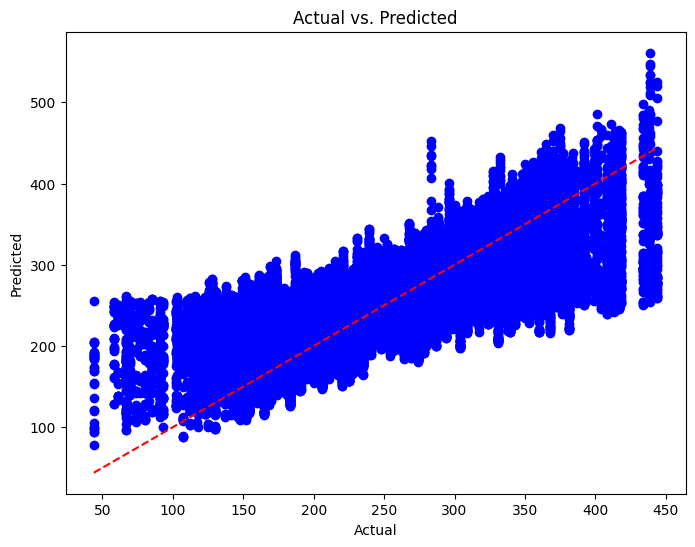

In [12]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


RANDOM FOREST REGRESSION


In [2]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0

    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [3]:
import pandas as pd
# Importing the dataset
df = pd.read_csv(r'C:\Users\Anusha Badami\Documents\Data Science Projects\odi.csv')
X = df.iloc[:,[7,8,9,12,13]].values
y = df.iloc[:, 14].values

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
# Preprocessing by feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,max_features=None)
model.fit(X_train,y_train)

RandomForestRegressor(max_features=None)

In [7]:
# Testing the dataset on trained model
y_pred = model.predict(X_test)
score = model.score(X_test,y_test)*100
print("R square value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))

R square value: 79.55279817004919
Custom accuracy: 77.12966657167284


In [8]:
# Testing with a custom input
import numpy as np
new_prediction = model.predict(sc.transform(np.array([[100,0,13,50,50]])))
print("Prediction score:" , new_prediction)


Prediction score: [314.77]


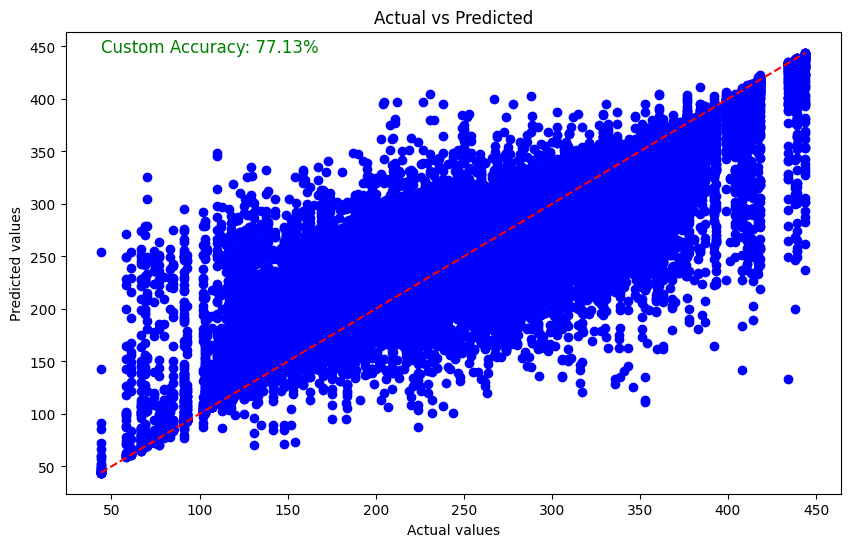

In [9]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line
plt.title('Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Calculate custom accuracy
threshold = 20
custom_acc = custom_accuracy(y_test, y_pred, threshold)

# Display custom accuracy as text on the plot
plt.text(min(y_test), max(y_pred), f'Custom Accuracy: {custom_acc:.2f}%', color='green', fontsize=12)

plt.show()
